In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.preprocessing import binarize
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV

# A sound object
def sound():
    os.system('E:/Downloads/DATA/Sosumi.aiff')

%matplotlib inline
sns.set_context('notebook')

#path = 'Z:/largetransfer/luc/carter'

In [2]:
# data=pd.read_csv(path+'/data/model_data/tci_final.csv',index_col=0)
data=pd.read_csv('Z:/largetransfer/luc/carter/data/model_data/tci_final(2016729).csv',index_col=0)

In [3]:
data['nluc']=data.nluc.astype(str)
data['pclass']= data.pclass.astype(str)
data['NAME10']= data.NAME10.astype(str)

In [4]:
#Creating dummy variables
nluc_dummy= pd.get_dummies(data.nluc) 
pclass_dummy=pd.get_dummies(data.pclass) 
Name10_dummy=pd.get_dummies(data.NAME10)

In [5]:
#matching new encoded values with parcel id
nluc_dummy['parcel']=data.parcel
pclass_dummy['parcel']=data.parcel
Name10_dummy['parcel']= data.parcel

In [6]:
#merging dummy variable to the data
data_final= pd.merge(data, nluc_dummy,left_on='parcel', right_on= 'parcel',how='left')
data_final= pd.merge(data_final,pclass_dummy,left_on='parcel',right_on='parcel', how='left')
data_final= pd.merge(data_final,Name10_dummy,left_on='parcel',right_on='parcel', how='left')
data_final.drop('nan',axis=1, inplace=True)


In [7]:
data_final.set_index('parcel',inplace=True)

In [8]:
#Removing certain features from the data set
t = list(data_final.columns)
for i in ['vacant_block','median_rent','property_crimes','burglaries',\
          'part_one_crimes','part_two_crimes','bachelors+','poverty_rate','median_hh_income',\
          'white','black','asian','other','hispanic','young','middle','old','nluc','NAME10','pclass','vacant']:
    if i in t:
        t.remove(i)
    
features = t


In [9]:
data_final[features].head()

,rnumstor,propsize,totusabl,tmktval,ownerocc_value,totbldgs,yrbuilt_filtered,bachelors.,lb_acquired,lb_tax_fc,...,1242.01,1242.02,1243.0,1245.0,1246.0,1261.0,1275.01,1964.0,1965.0,9801.0
parcel,,,,,,,,,,,,,,,,,,,,,
001-01-001,1.0,32768,4149.0,445500.0,1,1,1951,35.99,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001-01-003,1.5,81536,15828.0,1159600.0,1,1,1962,35.99,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001-01-004,1.5,13832,2537.0,266300.0,1,1,1957,35.99,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001-01-005,1.5,10500,1578.0,171700.0,1,1,1953,35.99,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001-01-006,2.0,16500,3650.0,296200.0,1,1,1928,35.99,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
rfc=RandomForestClassifier(n_estimators=60,max_depth=50,max_features=15,min_samples_split=10,min_samples_leaf=5\
                           ,oob_score =True,class_weight={0:1,1:10},random_state=6)

### Split data into training and testing sets

In [10]:
X_train,X_test,y_train,y_test=train_test_split(data_final[features],data_final["vacant"],test_size=0.2,random_state=7)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90372, 240)
(22593, 240)
(90372,)
(22593,)


In [ ]:
rfc.fit(X_train,y_train)

### Exploring attributes of after fitting

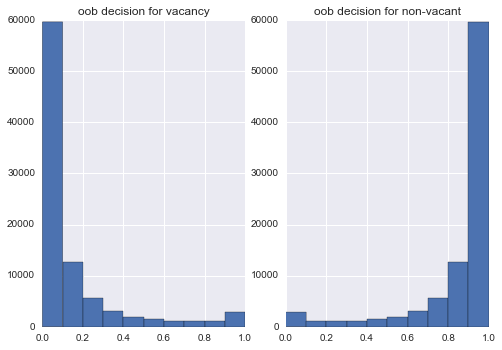

In [8]:
plt.subplot(1,2,1)
plt.hist(rfc.oob_decision_function_[:,1])
plt.title("oob decision for vacancy")
plt.subplot(1,2,2)
plt.hist(rfc.oob_decision_function_[:,0])
plt.title("oob decision for non-vacant")


In [9]:
pred=rfc.predict(X_test)
print(pred)

[0 0 0 ..., 0 0 0]


In [41]:
# The most important feature

importance_feat=dict(zip(features,rfc.feature_importances_))
for feat,val in importance_feat.items():
    if rfc.feature_importances_.max()==val:
        print(feat)


days_since_ovv


In [43]:
pd.crosstab(y_test,pred_class,rownames=["Actual"],colnames=["predicted"])

0.93486547704546707

### Building models

In [112]:
from scipy.stats import randint as sp_randint
from sklearn.externals import joblib
from time import time

n_trees=list(range(40,81))
n_features=list(range(20,31))

# param_grid=dict(n_estimators=n_trees,max_features=n_features)
start_time=time()

param_dist=dict(n_estimators=sp_randint(50,81),max_features=sp_randint(20,31))
    
rfc=RandomForestClassifier(class_weight={0:1,1:10},random_state=6)
# grid_rfc=GridSearchCV(rfc,param_grid,cv=10,scoring="accuracy") 
rand_rfc=RandomizedSearchCV(rfc, param_dist,cv=10,scoring="accuracy",n_iter=10)

# grid_rfc.fit(X_train,y_train)
rand_rfc.fit(X_train,y_train)

joblib.dump(rand_rfc, "Z:/largetransfer/luc/carter/models/rand_rfc1.pkl")

end_time=time()-start_time
sound()

In [10]:
pred3=rand_rfc.predict(X_test)
metrics.confusion_matrix(y_test,pred3)

array([[20377,   265],
       [ 1098,   887]])

In [18]:
pred=rand_rfc.predict(X_test)

In [20]:
pd.crosstab(y_test,pred,margins=True)

col_0,0,1,All
vacant,,,
0,20383,259,20642
1,1105,880,1985
All,21488,1139,22627


In [21]:
(20383+880)/22627

0.9397180359747205

 ### Ploting out-of-bag errors (oob)
 

In [ ]:
%timeit
%matplotlib inline
rfc=RandomForestClassifier(max_features=15\
                           ,oob_score =True,class_weight={0:1,1:10},random_state=6,warm_start=True)
oob_error=[]
for i in range(20,175):
    rfc.set_params(n_estimators=i)
    rfc.fit(X_train,y_train)
    oob_error.append(1-rfc.oob_score_)


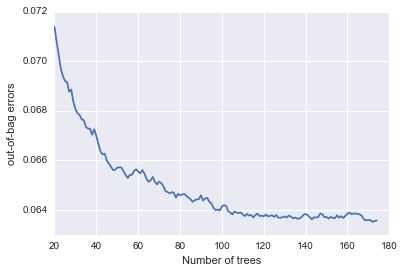

In [57]:
plt.plot(range(20,175),oob_error)
plt.xlabel("Number of trees")

plt.ylabel("out-of-bag errors")

In [113]:
from scipy.stats import randint as sp_randint
from time import time
from itertools import islice,count
from sklearn.externals import joblib

start=time()

param_dist=dict(n_estimators= sp_randint(200,250),\
                max_features= sp_randint(20,30),\
                max_depth= sp_randint(2,10),\
               learning_rate =list(islice(count(0.01,0.01),0,10)))
         
gbm=GradientBoostingClassifier(random_state=10)

rand_gbm=RandomizedSearchCV(gbm,param_dist,cv=10,scoring='accuracy',n_iter=5)

rand_gbm.fit(X_train,y_train)

joblib.dump(rand_gbm,"Z:/largetransfer/luc/carter/models/rand_gbm1.pkl")

end_time=time()-start
sound()

In [9]:
from sklearn.externals import joblib
joblib.dump(rand_gbm,"Z:/largetransfer/luc/carter/models/rand_gbm1.pkl")

['C:\\Users\\senatoduro8\\Poverty_center\\rand_gbm1.pkl',
 'C:\\Users\\senatoduro8\\Poverty_center\\rand_gbm1.pkl_01.npy',
 'C:\\Users\\senatoduro8\\Poverty_center\\rand_gbm1.pkl_02.npy',
 'C:\\Users\\senatoduro8\\Poverty_center\\rand_gbm1.pkl_03.npy',
 'C:\\Users\\senatoduro8\\Poverty_center\\rand_gbm1.pkl_04.npy',
 'C:\\Users\\senatoduro8\\Poverty_center\\rand_gbm1.pkl_05.npy',
 'C:\\Users\\senatoduro8\\Poverty_center\\rand_gbm1.pkl_06.npy',
 'C:\\Users\\senatoduro8\\Poverty_center\\rand_gbm1.pkl_07.npy',
 'C:\\Users\\senatoduro8\\Poverty_center\\rand_gbm1.pkl_08.npy',
 'C:\\Users\\senatoduro8\\Poverty_center\\rand_gbm1.pkl_09.npy',
 'C:\\Users\\senatoduro8\\Poverty_center\\rand_gbm1.pkl_10.npy',
 'C:\\Users\\senatoduro8\\Poverty_center\\rand_gbm1.pkl_11.npy',
 'C:\\Users\\senatoduro8\\Poverty_center\\rand_gbm1.pkl_12.npy',
 'C:\\Users\\senatoduro8\\Poverty_center\\rand_gbm1.pkl_13.npy',
 'C:\\Users\\senatoduro8\\Poverty_center\\rand_gbm1.pkl_14.npy',
 'C:\\Users\\senatoduro8\\Povert

### Utility function for reporting of top models

In [ ]:
def report(grid_scores, n_top=3):
    """For reporting top best models"""
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

In [108]:
from sklearn.preprocessing import StandardScaler
from time import time
from sklearn.externals import joblib
start_time=time()
# Scaling features

X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

# Parameter options using the l1 penalty
grid_param1={'penalty':['l2'],\
           'solver':['newton-cg'],\
           'C':[ 0.001,0.01, 0.1, 1, 10,100,1000]}

log_reg1=LogisticRegression(tol=0.0001, max_iter=300,class_weight={0:1,1:10})

# Creating gridsearch obj using the above setings
grid_reg1=GridSearchCV(log_reg1,grid_param1,cv=10,scoring='accuracy',error_score=0)

grid_reg1.fit(X_train,y_train)

joblib.dump(grid_reg1,'Z:/largetransfer/luc/carter/models/logistic_reg.pkl')

total_time=time()-start_time

sound()


In [109]:
from sklearn.externals import joblib

In [25]:
joblib.dump(grid_reg1,'Z:/largetransfer/luc/carter/models/logistic_reg.pkl')

# joblib.dump(grid_reg1,'C:\\Users\\senatoduro8\\Poverty_center\\serialized_models\\logistic_reg.pkl')

['C:\\Users\\senatoduro8\\Poverty_center\\serialized_models\\logistic_reg.pkl',
 'C:\\Users\\senatoduro8\\Poverty_center\\serialized_models\\logistic_reg.pkl_01.npy',
 'C:\\Users\\senatoduro8\\Poverty_center\\serialized_models\\logistic_reg.pkl_02.npy',
 'C:\\Users\\senatoduro8\\Poverty_center\\serialized_models\\logistic_reg.pkl_03.npy',
 'C:\\Users\\senatoduro8\\Poverty_center\\serialized_models\\logistic_reg.pkl_04.npy',
 'C:\\Users\\senatoduro8\\Poverty_center\\serialized_models\\logistic_reg.pkl_05.npy',
 'C:\\Users\\senatoduro8\\Poverty_center\\serialized_models\\logistic_reg.pkl_06.npy',
 'C:\\Users\\senatoduro8\\Poverty_center\\serialized_models\\logistic_reg.pkl_07.npy',
 'C:\\Users\\senatoduro8\\Poverty_center\\serialized_models\\logistic_reg.pkl_08.npy',
 'C:\\Users\\senatoduro8\\Poverty_center\\serialized_models\\logistic_reg.pkl_09.npy',
 'C:\\Users\\senatoduro8\\Poverty_center\\serialized_models\\logistic_reg.pkl_10.npy',
 'C:\\Users\\senatoduro8\\Poverty_center\\serializ

In [110]:
# Note that you standardize the test and training data so check to make sure you did that before running the cell
pred_lg=grid_reg1.predict(X_test)
metrics.confusion_matrix(y_test,pred_lg)

array([[18058,  2482],
       [  481,  1572]])

In [ ]:
# Make sure the test data is not standardized so check it!

gbm1=joblib.load('C:\\Users\\senatoduro8\\Poverty_center\\serialized_models\\rand_gbm1.pkl')
pred_gbm=gbm1.predict(X_test)
metrics.confusion_matrix(y_test,pred_gbm)

# Making predictions
1. Logistic model
2. Random Forest
3. Gradient Boosting

In [12]:
from sklearn.externals import joblib

logistic=joblib.load('Z:/largetransfer/luc/carter/models/logistic_reg.pkl')
gradientB=joblib.load('Z:/largetransfer/luc/carter/models/rand_gbm1.pkl')
RandomF=joblib.load("Z:/largetransfer/luc/carter/models/rand_rfc1.pkl")

### Exploring the logistic model

In [13]:
#Best model after the Randomized search
logistic.best_estimator_

LogisticRegression(C=0.001, class_weight={0: 1, 1: 10}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=300,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [14]:
#Checking the parameters used for the model selection
logistic.best_params_

{'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}

In [15]:
#Accuracy score
logistic.best_score_

0.86999291816049218

In [132]:
#predicted values
from sklearn.preprocessing import StandardScaler
X_testlg=StandardScaler().fit_transform(X_test)
predicted=logistic.predict(X_testlg)


In [133]:
#Measuring model accuracy
metrics.accuracy_score(y_test,predicted)

0.86885318461470362

In [134]:
metrics.confusion_matrix(y_test,predicted)

array([[18058,  2482],
       [  481,  1572]])

In [135]:
pd.crosstab(y_test,predicted, margins=True,colnames=['predicted'],rownames=['Actual'])

predicted,0,1,All
Actual,,,
0,18058,2482,20540
1,481,1572,2053
All,18539,4054,22593


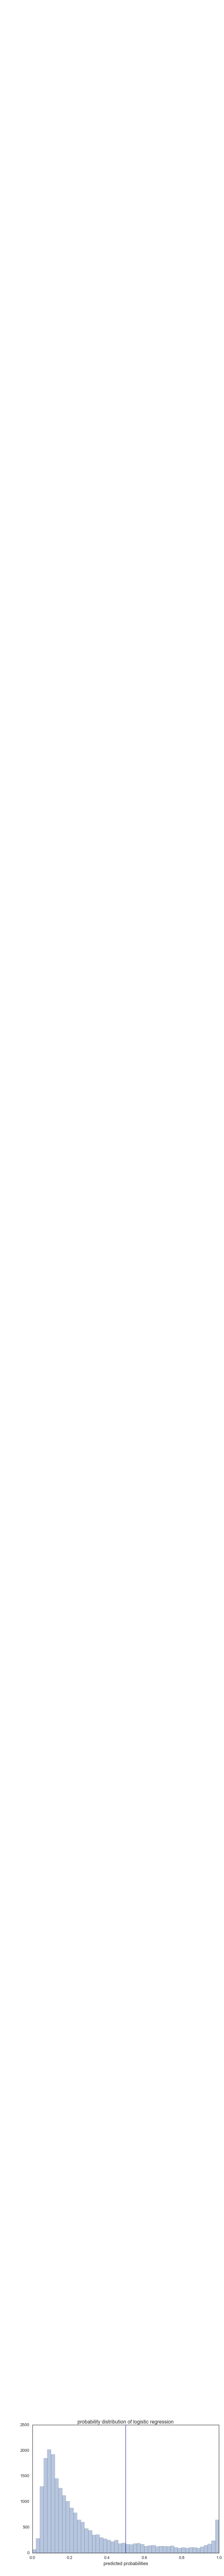

In [137]:
# Visualizing the distribution of the  predicted probabilities
sns.set_style('white')

predprob=logistic.predict_proba(X_testlg)[:,1]

def distprob(predprob,threshold,model='',adjusted=False):
    """Utility for plotting the distribution probability"""
    
    sns.distplot(predprob,kde=False)
    plt.axvline(threshold,color='DarkBlue', alpha=0.5)
    plt.xlabel('predicted probabilities')
    ax=plt.gca()
    ax.annotate('Decision boundary', xy=(threshold,7500), xytext=(threshold+0.2,8000),
                arrowprops=dict(facecolor='black', shrink=0.08),
                )
    if adjusted:
        plt.title('probability distribution of '+model +' with adjusted threshold:%.2f'%threshold)
    else:
        plt.title('probability distribution of '+model)


    
distprob(predprob,0.5,'logistic regression')

In [50]:
#Coefficients of the model
coef=logistic.best_estimator_.coef_.T[:35].ravel()
var=data_final.columns[:35]
pd.DataFrame(dict(list(zip(['variables','coef'],[var,coef]))))


,coef,variables
0,-0.069279,vacant
1,-0.081273,rnumstor
2,-0.021483,propsize
3,-0.254867,totusabl
4,-0.141198,tmktval
5,-0.016724,ownerocc_value
6,-0.152969,totbldgs
7,-0.007600,yrbuilt_filtered
8,0.047800,vacant_block
9,-0.030829,median_rent


In [138]:
# Tuning the prediction probabilities and setting roc_curve
adjusted_prediction=np.where(predprob>0.2,1,0)

In [139]:
pd.crosstab(y_test,adjusted_prediction,colnames=['predicted'],rownames=['Actual'])

predicted,0,1
Actual,,
0,12173,8367
1,141,1912


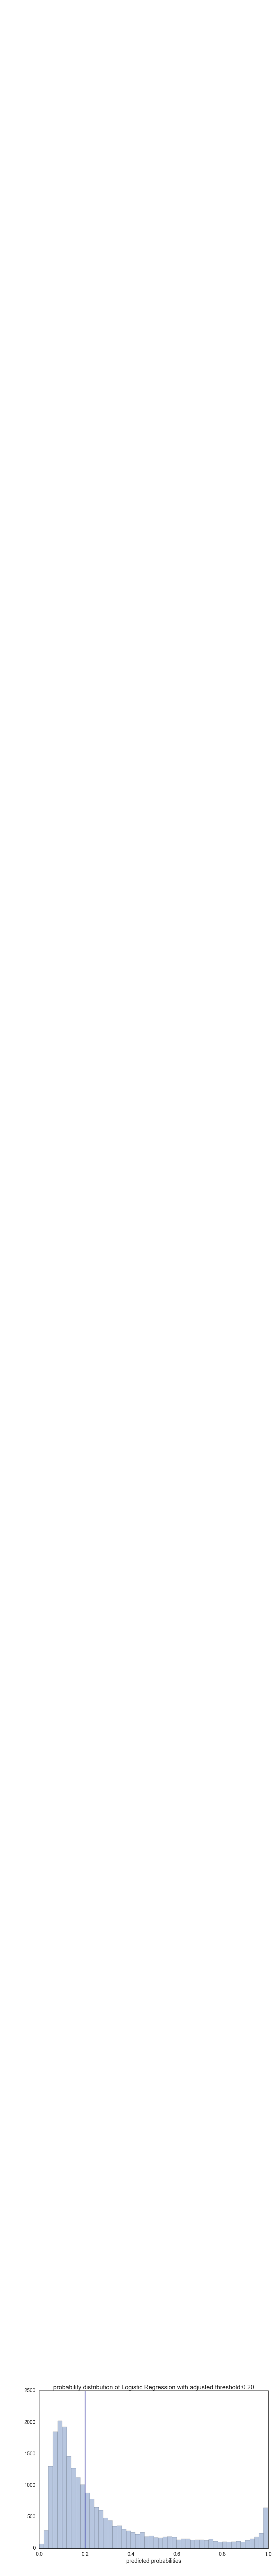

In [158]:
#adjusting the decision line to 0.2
distprob(predprob,0.2,adjusted=True, model='Logistic Regression')

### Exploring the Randomforest model


In [115]:
RandomF.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 10},
            criterion='gini', max_depth=None, max_features=27,
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=61, n_jobs=1,
            oob_score=False, random_state=6, verbose=0, warm_start=False)

In [76]:
important_features=RandomF.best_estimator_.feature_importances_
feature_map=dict(zip(['features','values'],[features,important_features]))
pd.DataFrame(feature_map).head()

,features,values
0,rnumstor,0.007258
1,propsize,0.024690
2,totusabl,0.027415
3,tmktval,0.039781
4,ownerocc_value,0.009037


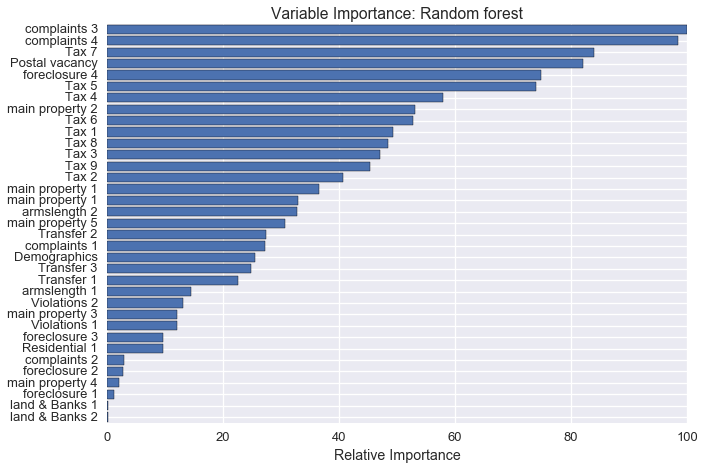

In [88]:
#variable importance plotting utility


def important_feature_plot(variables,values,model=''):
    # Plot feature importance
    sns.set_context('talk')

    # make importances relative to max importance
    features1=np.array(variables)
    feature_importance = 100.0 * (values / values.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
#     plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos,features1[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance: '+ model)
    plt.show()
    
feature_lab=['Residential 1','main property 1','main property 1','main property 2','main property 3','main property 4'\
            ,'main property 5','Demographics','land & Banks 1','land & Banks 2','Tax 1','Tax 2','Tax 3','Tax 4','Tax 5','Tax 6'\
            ,'Tax 7','Tax 8','Postal vacancy','Violations 1','Violations 2','complaints 1','complaints 2','complaints 3','complaints 4',\
            'foreclosure 1','foreclosure 2','foreclosure 3','foreclosure 4','Transfer 1','Transfer 2','Transfer 3','armslength 1','armslength 2',\
            'Tax 9']

important_feature_plot(feature_lab,important_features[:35],'Random forest')

In [86]:
pd.DataFrame(dict(zip(['tick labels','model variables'],[feature_lab,features[:35]])))

,model variables,tick labels
0,rnumstor,Residential 1
1,propsize,main property 1
2,totusabl,main property 1
3,tmktval,main property 2
4,ownerocc_value,main property 3
5,totbldgs,main property 4
6,yrbuilt_filtered,main property 5
7,bachelors.,Demographics
8,lb_acquired,land & Banks 1
9,lb_tax_fc,land & Banks 2


In [118]:
#Making a prediction
predicted_rf=RandomF.predict(X_test)
pd.crosstab(y_test,predicted_rf,colnames=['predicted'],rownames=['Actual'])

predicted,0,1
Actual,,
0,20288,252
1,1172,881


In [119]:
print('Calculated score: %.5f \n RandomizedScore: %.5f'%(metrics.accuracy_score(y_test,predicted_rf),RandomF.best_score_))

Calculated score: 0.93697 
 RandomizedScore: 0.94175


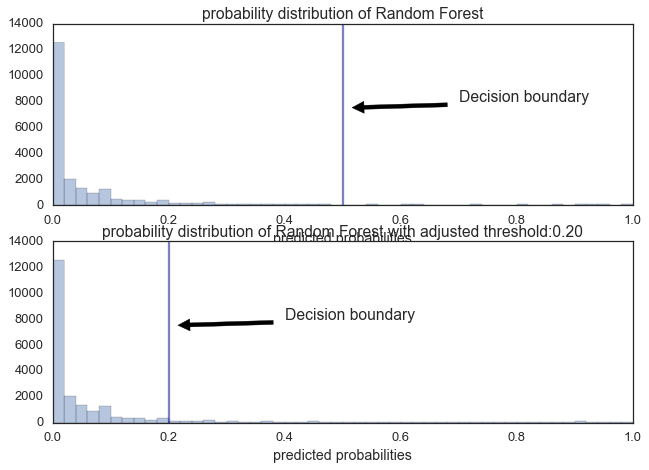

In [121]:
#prediction probability
prob_rf=RandomF.predict_proba(X_test)[:,1]
plt.subplot(211)
distprob(prob_rf,0.5,model='Random Forest')
plt.subplot(212)
distprob(prob_rf,0.2,model='Random Forest', adjusted=True)

In [122]:
#Adjusting the thresholds and setting the roc curves
newpred_rf=np.where(prob_rf>0.2,1,0)

pd.crosstab(y_test,newpred_rf,colnames=['predicted'],rownames=['Actual'])

predicted,0,1
Actual,,
0,19341,1199
1,666,1387


### Gradient Boosting

In [123]:
#checking the best estimator obtained from the Randomized grid parameter search
gradientB.best_estimator_

GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
              max_depth=7, max_features=24, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=214,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False)

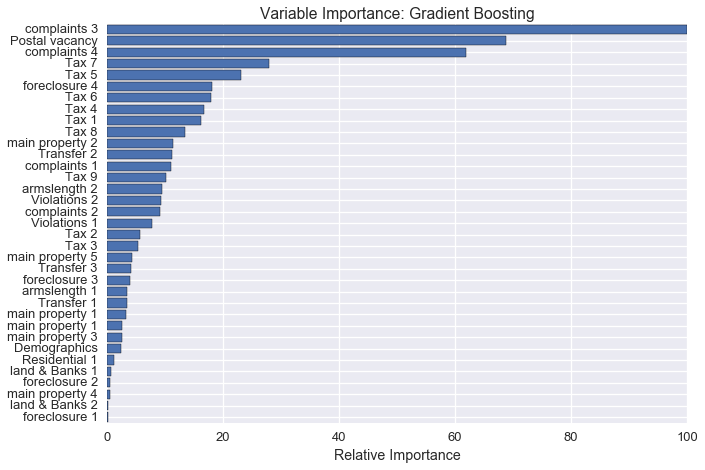

In [91]:
important_feat=gradientB.best_estimator_.feature_importances_

important_feature_plot(feature_lab,important_feat[:35],'Gradient Boosting')

In [125]:
predictedgb=gradientB.predict(X_test)

In [126]:
pd.crosstab(y_test,predictedgb,colnames=['predicted'],rownames=['Actual'])

predicted,0,1
Actual,,
0,20348,192
1,1222,831


In [127]:
#Accuracy score
metrics.accuracy_score(y_test,predictedgb)

0.93741424334971013

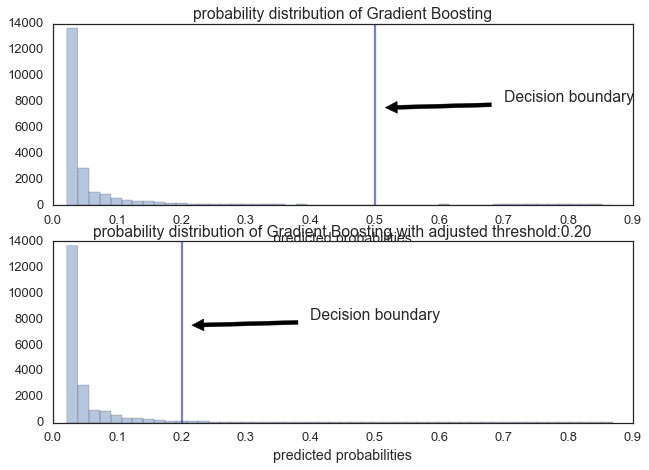

In [128]:
prob_gbm=gradientB.predict_proba(X_test)[:,1]
plt.subplot(211)
distprob(prob_gbm,0.5,model='Gradient Boosting')
plt.subplot(212)
distprob(prob_gbm,0.2,model='Gradient Boosting', adjusted=True)

In [129]:
adjustpredgb=np.where(prob_gbm>0.2,1,0)
pd.crosstab(y_test,adjustpredgb,colnames=['Predicted'],rownames=['Actual'])

Predicted,0,1
Actual,,
0,19715,825
1,760,1293


## ROC CURVES

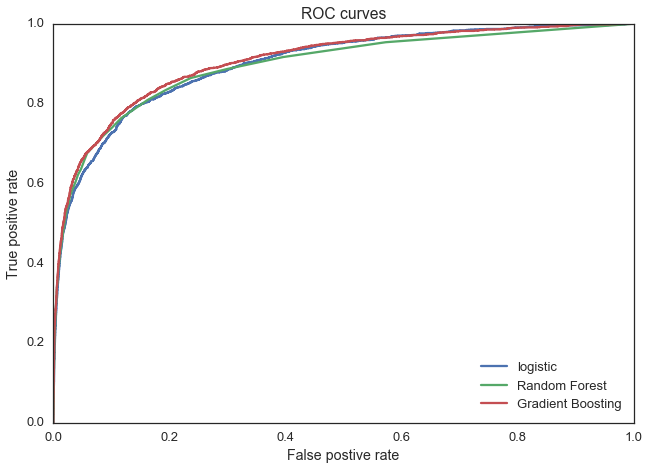

In [141]:
def roc_curve(actual,score,model=''):
    fpr,tpr,thresholds=metrics.roc_curve(actual,score)
    plt.plot(fpr,tpr,label=model)
    plt.title('ROC curves')
    plt.xlabel('False postive rate')
    plt.ylabel('True positive rate')
    
roc_curve(y_test,predprob,'logistic')
plt.hold('on')
roc_curve(y_test,prob_rf,'Random Forest')
plt.hold('on')
roc_curve(y_test,prob_gbm,'Gradient Boosting')
plt.hold('off')
plt.legend(loc='lower right')

## Specificity, and sensitivity of models

In [142]:
model_predictions=[predicted,predicted_rf,predictedgb]
print('Summary of model performance')
for i,pred in enumerate(model_predictions):
    if i == 1:
        print("For Logistic model")
    elif i == 2:
        print('For random forest')
    else:
        print('for gradient boosting')
        
    print(metrics.classification_report(y_test,pred))
    print('\n')

Summary of model performance
for gradient boosting
             precision    recall  f1-score   support

          0       0.97      0.88      0.92     20540
          1       0.39      0.77      0.51      2053

avg / total       0.92      0.87      0.89     22593



For Logistic model
             precision    recall  f1-score   support

          0       0.95      0.99      0.97     20540
          1       0.78      0.43      0.55      2053

avg / total       0.93      0.94      0.93     22593



For random forest
             precision    recall  f1-score   support

          0       0.94      0.99      0.97     20540
          1       0.81      0.40      0.54      2053

avg / total       0.93      0.94      0.93     22593





In [143]:
results=pd.DataFrame({'Logistic':predicted,'Random_forest':predicted_rf,'Gradient_Boosting':predictedgb})
results.to_csv('C:\\Users\\senatoduro8\\Poverty_center\\Predictions.csv')
results.to_csv('Z:/largetransfer/luc/carter/data/predictions/Predictions.csv')